## Guided Project: Storytelling Data Visualization on Exchange Rates
#### *By: Naftali N Indongo*

### 1. Introduction
At the beginning of this course, we learned that there are two types of data visualization:

* Exploratory data visualization: we create graphs for ourselves to better understand and explore data.
* Explanatory data visualization: we create graphs for others to inform, make a point, or tell a story.

Throughout the course, we focused on explanatory data visualization and learned the following:

* How to use information design principles (familiarity and maximizing the data-ink ratio) to create better graphs for an audience.
* About the elements of a story and how to create storytelling data visualizations using Matplotlib.
* How to create visual patterns using Gestalt principles.
* How to guide the audience's attention with pre-attentive attributes.
* How to use Matplotlib built-in styles — with a case study on the FiveThirtyEight style.

In this  guided project, we'll go one step further and combine the skills learning in this course.

The dataset we'll use describes Euro daily exchange rates between 1999 and 2021. The euro (symbolized with €) is the official currency in most of the countries of the European Union.

If the exchange rate of the euro to the US dollar is 1.5, you get 1.5 US dollars if you pay 1.0 euro (one euro has more value than one US dollar at this exchange rate).

Daria Chemkaeva put together the data set and made it available on [Kaggle](https://www.kaggle.com/lsind18/euro-exchange-daily-rates-19992020) — the data source is the European Central Bank. Note that the dataset gets regular updates — we downloaded it on January 2021.

Let's start by reading in the dataset. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
exchange_rates = pd.read_csv("euro-daily-hist_1999_2020.csv")

In [2]:
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214


In [3]:
exchange_rates.tail()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
5694,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
5695,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
5696,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
5697,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
5698,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358


In [4]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

Looking at the infromation about the dataset, we can deduce the following:

* The dataset have 5699 rows (0 to 5698) and 41 columns.
* 17 columns columns contains some null values (about 40% of the columns).
* Columns 19-<font color='red'>[Iceland krona ]</font>, 31-<font color='red'>[Romanian leu ]</font> and 38-<font color='red'>[Turkish lira ]</font> consists of float64 datatypes and the rest consists of odject data type.

### 2. Data Cleaning

Before we start creating data visualizations, we'll need to do a bit of data cleaning. Our focus in the guided part of the project will be on the exchange rate between the euro and the American dollar.

Below, we do the following:
* We rename the <font color='red'>[US dollar ]</font> and <font color='red'>Period\Unit:</font> columns to something easier to type — <font color='red'>US_dollar</font> and <font color='red'>Time</font>.
* We change the <font color='red'>Time</font> column to a <font color='red'>datetime</font> data type.
* We sort the values by <font color='red'>Time</font> in ascending order.
* We reset the index (and drop the initial index).



In [5]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

In [6]:
euro_to_dollar = exchange_rates[['Time', 'US_dollar']]
euro_to_dollar.head()

,Time,US_dollar
0,1999-01-04,1.1789
1,1999-01-05,1.1790
2,1999-01-06,1.1743
3,1999-01-07,1.1632
4,1999-01-08,1.1659


In [7]:
euro_to_dollar.copy()['US_dollar'].value_counts()

-         62
1.2276     9
1.1215     8
1.1305     7
1.1193     6
          ..
1.1255     1
1.3344     1
0.9112     1
1.4971     1
1.3216     1
Name: US_dollar, Length: 3528, dtype: int64

We notice that <font color='red'>US_dollar</font> column have 62 missing values. These are the values where there is character <font color='red'>-</font>.

Below we will drop all the rows where the <font color='red'>-</font> character appears in the <font color='red'>US_dollar</font> column and convert the <font color='red'>US_dollar</font> column to <font color='red'>float</font> data type.

In [8]:
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar']!= '-']
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)

### 3. Rolling Mean

Now that we're finished cleaning the data, we'll generate a line plot to visualize the evolution of the euro-dollar exchange rate.

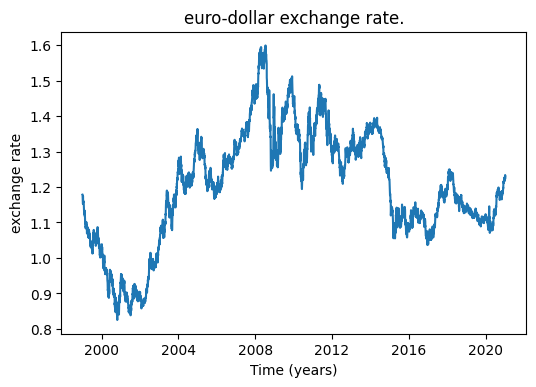

In [9]:
plt.plot(euro_to_dollar['Time'],euro_to_dollar['US_dollar'])
plt.title('euro-dollar exchange rate.')
plt.xlabel('Time (years)')
plt.ylabel('exchange rate')
plt.show()

If we look at the line's shape, we see many small wiggles — rather than seeing a smooth line. The wiggles, however, have meaning: : they are the visual representation of the daily variation in the exchange rate. The rate goes up and down, up and down again, day to day. The rate only shows clear upward or downward trends in the longer run (months or years).

Depending on our goals, we may not want to show that daily variation on our graph. If we want to hide it and show only the long-term trends, we can use the **rolling mean** (also known as the moving average).

We can calculate the mean for each day using the <font color='red'>pandas.Series.rolling().mean()</font> [method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.rolling.html) — the only exception is the first day, which doesn't have a previous day.

For example, the rolling mean is calculated using values from two days — the current day and the previous day. We call the number of days used in the calculation the **rolling window** (or moving window). If the rolling window is three, then we calculate the mean between the value of the current day and the values of the previous two days.

The rolling window can take various values — some common values include seven (one week), 30 (one month), 50 or 100 days, or 365 days (one year).

Below, we see how our line plot changes visually as we increase the rolling window. The window gets larger, and the line becomes smoother. This increases the data-ink ratio, and it can be useful if we want the audience to focus only on long-term trends.

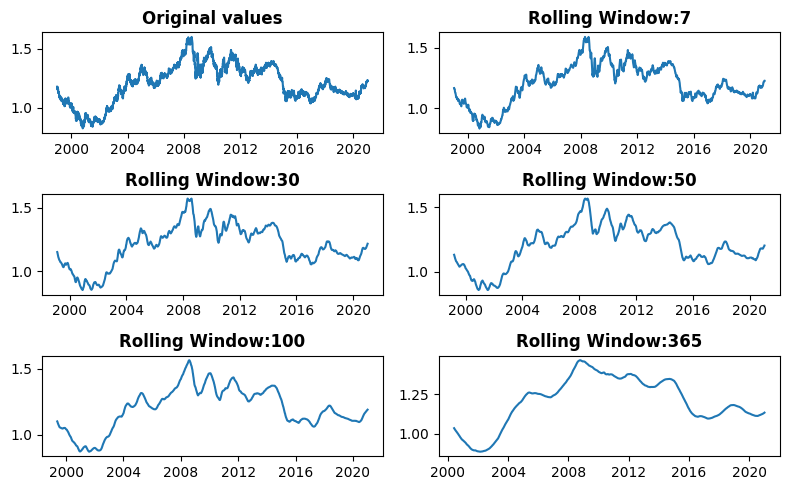

In [10]:
plt.figure(figsize=(8,5))
plt.subplot(3,2,1)
plt.plot(euro_to_dollar['Time'],euro_to_dollar['US_dollar'])
plt.title('Original values', weight='bold')

for i, rolling_window in zip(range(2,7),[7, 30, 50, 100, 365]):
    plt.subplot(3,2,i)
    plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'].
             rolling(rolling_window).mean())
    plt.title('Rolling Window:{}'.format(rolling_window), weight = 'bold')
    
plt.tight_layout() 
plt.show()

Below we calculate the rolling means for the <font color='red'>US_dollar</font> column using a moving window of 30 days.

In [11]:
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()
euro_to_dollar.tail()

,Time,US_dollar,rolling_mean
5694,2021-01-04,1.2296,1.211170
5695,2021-01-05,1.2271,1.212530
5696,2021-01-06,1.2338,1.213987
5697,2021-01-07,1.2276,1.215357
5698,2021-01-08,1.2250,1.216557


### 4. Comming up with an Idea

On this screen, we're going to spend some time coming up with an idea for the graph we want to build. Our goal is to create a storytelling data visualization using the data we have.

To create a story, remember that we need to arrange our data into a series of events that show change.

Here are a few story ideas for our data:

* We show how the euro-dollar rate has changed during the coronavirus pandemic. We can show the 2020 data and the 2016-2019 data as a baseline. We can use a line plot.
* We show how the euro-dollar rate changed during the 2007-2008 financial crisis. We can also show the data for 2006 and 2009 for comparison. We can use a line plot.
* We show comparatively how the euro-dollar rate changed under the last three US presidents (George W. Bush (2001-2009), Barack Obama (2009-2017), and Donald Trump (2017-2021)). We can use a line plot.

In this project, we would like to explore the above mentioned ideas.

### 5. Sketching a Graph

Now that we know what story we want to tell, we're going to think more about how the graph is going to look.

First, we need to choose the right graph type. The graph should give our story the visual form it needs — we don't want to choose a histogram to visually represent a time series.

Equally important, we need to choose something that our audience will be familiar with. To simplify your work, you can choose any audience you want for your graph.

Next, we're going to sketch the graph — we do this before writing the code. In sketching the graph, it's important to use some of the principles we've learned so far:

* Maximize the data-ink ratio.
* Create visual patterns using Gestalt principles.
* Guide the audience's attention using pre-attentive attributes.

These design principles can help you in two ways:

* They generate design options.
* They help you choose among those options.

We will use a pen and paper to sketch the graph, ti get a visual picture of how our line graphs will look like.

### 6. Coding the Graphs

Now that we have a good idea of the story we want to tell and how it's going to look, we'll start coding.

### Storytelling Data Visualization Examples
#### a) The coronavirus pandemic

We will first show how the euro-dollar rate has changed during the coronavirus pandemic. We will show the 2020 data in comparison to the 2016-2019 data as a baseline using a line plot.

In [12]:
pandemic = euro_to_dollar[(euro_to_dollar['Time'].dt.year==2020)]
euro_to_dollar_16_19 = euro_to_dollar[(euro_to_dollar['Time'].dt.year>=2016) & (euro_to_dollar['Time'].dt.year<=2019)]

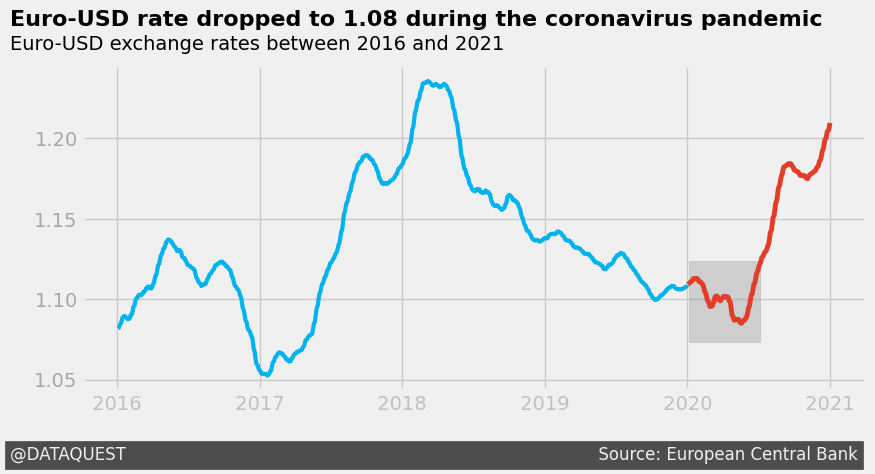

In [55]:
# Using the FiveThirtyEight style
style.use('fivethirtyeight')

# Adding the plot
fig, ax = plt.subplots(figsize = (9,4))
ax.plot(euro_to_dollar_16_19['Time'],euro_to_dollar_16_19
        ['rolling_mean'], color = '#00B2EE', linewidth =3)

# Highlighting the pandemic period on the plot
ax.plot(pandemic['Time'],pandemic['rolling_mean'], color = '#e23d28', linewidth =3.5)
ax.set_yticklabels(['','1.05', '1.10','1.15', '1.20'], alpha=0.3)
ax.set_xticklabels([' ',' 2016 ',' 2017 ',' 2018 ', ' 2019 ',' 2020 ', ' 2021 '],alpha=0.2)

## Adding a title and a subtitle  
ax.text(735690,1.27, s = 'Euro-USD rate dropped to 1.08 during the coronavirus pandemic', weight= 'bold', size = 16)
ax.text(735690,1.255, s ='Euro-USD exchange rates between 2016 and 2021', size = 14)  

#Highlighting the bott of the peak with a gray rectangle
ax.axvspan(xmin=737430.0, xmax=737610, ymin=0.15, ymax=0.4, alpha=0.3, 
           color='grey')

# Adding the signature bar
ax.text(735690,1.0, s = "@DATAQUEST" +" "*90 + "Source: European Central Bank", color = "#f0f0f0", backgroundcolor = "#4d4d4d", size =12)



plt.show()

#### a) Financial Crisis

We will first start by showing how the euro-dollar exchange rate changed during the 2007-2008 financial crisis by comparing it with the data for 2006 and 2009 using. We can use a line plot.

In [14]:
financial_crisis = euro_to_dollar[(euro_to_dollar['Time'].
                                 dt.year>=2006) & (euro_to_dollar['Time'].dt.year<=2009)]
financial_crisis_7_8 = euro_to_dollar[(euro_to_dollar['Time'].
                                 dt.year>=2007) & (euro_to_dollar['Time'].dt.year<=2008)]

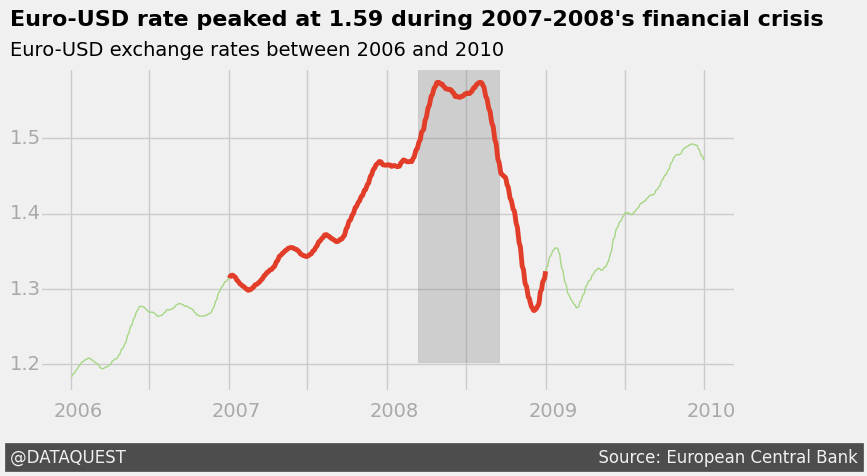

In [15]:
# Using the FiveThirtyEight style
style.use('fivethirtyeight')

# Adding the plot
fig, ax = plt.subplots(figsize = (8,4))
ax.plot(financial_crisis['Time'],financial_crisis
        ['rolling_mean'], color = '#A6D785', linewidth =1)

# Highlighting the 2007-2008 period on the plot
ax.plot(financial_crisis_7_8['Time'],financial_crisis_7_8
        ['rolling_mean'], color = '#e23d28', linewidth =3.5)

#Highlighting the top of the peak with a gray rectangle
ax.axvspan(xmin=733112.0, xmax=733300, ymin=0.09, alpha=0.3, 
           color='grey')
# Removing the ticks labels
ax.set_xticklabels([])
ax.set_yticklabels([])

# Adding new tick labels
y_A =1.13
x_A =732172
x_coords = {'2006': 732272, '2007':732637, '2008': 733002, 
            '2009':733367, '2010': 733732}
y_coords = {'1.2': 1.193, '1.3':1.293, '1.4':1.393, '1.5':1.493}

for x_label,x_coord in x_coords.items(): #x_ticks labels
    ax.text(x_coord, y_A, x_label, color ='darkgrey')
for y_label,y_coord in y_coords.items(): #y_ticks labels
    ax.text(x_A,y_coord, y_label, color ='darkgrey')
    
## Adding a title and a subtitle  
ax.text(732172,1.65, s = 'Euro-USD rate peaked at 1.59 during 2007-2008\'s financial crisis', weight= 'bold', size = 16)
ax.text(732172,1.61, s ='Euro-USD exchange rates between 2006 and 2010', size = 14)  

# Adding a signature bar
ax.text(732172,1.07, s = "@DATAQUEST" +" "*90 + "Source: European Central Bank", color = "#f0f0f0", backgroundcolor = "#4d4d4d", size =12)
plt.show()

### b) The last three US presidents

Below we will show how the euro-dollar exchange rate changed under the last three US presidents (George W. Bush (2001-2009), Barack Obama (2009-2017), and Donald Trump (2017-2021).

In [16]:
Last_3_presidents = euro_to_dollar[(euro_to_dollar['Time'].
                                 dt.year>=2001) & (euro_to_dollar['Time'].dt.year<=2021)]
Bush = euro_to_dollar[(euro_to_dollar['Time'].
                                 dt.year>=2001) & (euro_to_dollar['Time'].dt.year<2009)]
Obama = euro_to_dollar[(euro_to_dollar['Time'].
                                 dt.year>=2009) & (euro_to_dollar['Time'].dt.year<2017)]
Trump = euro_to_dollar[(euro_to_dollar['Time'].
                                 dt.year>=2017) & (euro_to_dollar['Time'].dt.year<2021)]

Below, we will use matplotlib's functional approach to plot the graphs as follow:
- We will first plot the three graphs for Bush, Obama and Trump at the top of a 2-by-3 grid leaving the bottom empty.
- Then plot the graph representing the three presidents together at the bottom of the 2-by-1 grid.
- Lastly, we will merge the two grids.

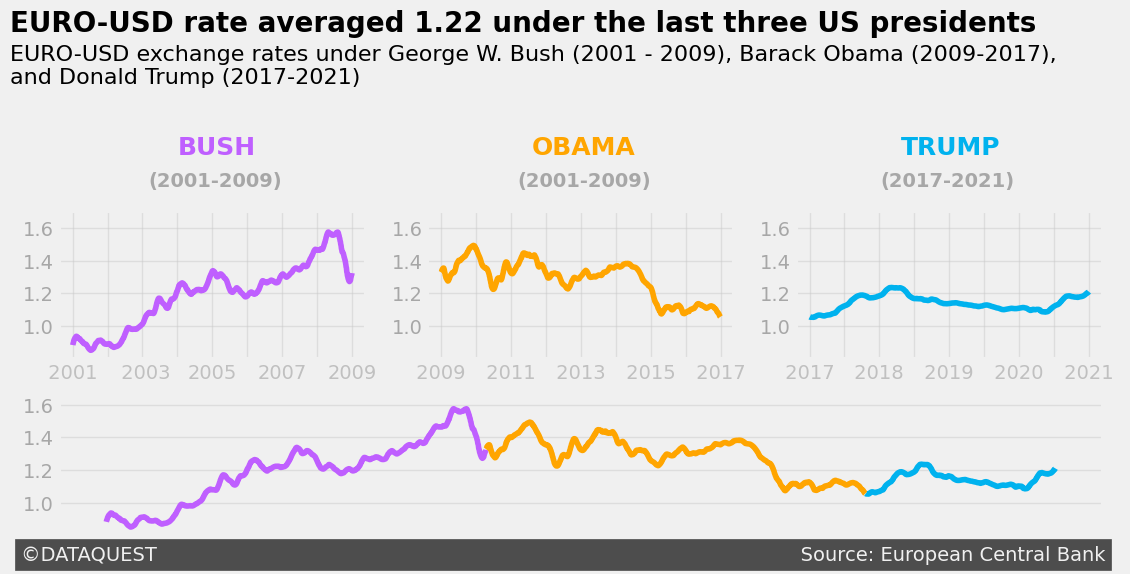

In [17]:
#Using the FiveThirtyEight style
style.use('fivethirtyeight')
plt.figure(figsize=(12, 4))
ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)
ax4 = plt.subplot(2,1,2)
axes = [ax1, ax2, ax3, ax4]

# Cahnging the exis labels
for ax in axes:
    ax.set_ylim(0.8, 1.7)
    ax.set_yticks([1.0, 1.2, 1.4, 1.6])
    ax.set_yticklabels(['1.0', '1.2','1.4', '1.6'],
                  alpha=0.3)
    ax.grid(alpha=0.5)  

#plotting the three graphs for Bush, Obama and Trump on ax1 to ax3.

# a) Bush
ax1.plot(Bush['Time'], Bush['rolling_mean'],color = '#BF5FFF')
ax1.set_xticklabels([' ',' 2001 ',' ',' 2003','','2005',' ', '2007','','2009'],alpha=0.2)
ax1.text(731580.0, 2.05, 'BUSH', fontsize=18, weight='bold',color='#BF5FFF')
ax1.text(731280.0, 1.85, '(2001-2009)', weight='bold',alpha=0.3)

# b) Obama
ax2.plot(Obama['Time'], Obama['rolling_mean'],color = '#ffa500')
ax2.set_xticklabels([' ',' 2009 ',' ',' 2011 ',' ',' 2013 ',' ', ' 2015 ',' ',' 2017 '],alpha=0.2)
ax2.text(734350, 2.05, 'OBAMA', fontsize=18, weight='bold',color='#ffa500')
ax2.text(734200, 1.85, '(2001-2009)', weight='bold',alpha=0.3)

# c) Trump
ax3.plot(Trump['Time'], Trump['rolling_mean'],color = '#00B2EE')
ax3.set_xticklabels([' 2017 ',' ',' 2018 ',' ',' 2019 ',' ', ' 2020 ',' ',' 2021 '],alpha=0.2)
ax3.text(736809.0, 2.05, 'TRUMP', fontsize=18, weight='bold',color='#00B2EE')
ax3.text(736700.0, 1.85, '(2017-2021)', weight='bold',alpha=0.3)

# Plotting the Last_3_presidents on the a 2-by-1 grid
ax4.plot(Bush['Time'], Bush['rolling_mean'],color = '#BF5FFF')
ax4.plot(Obama['Time'], Obama['rolling_mean'],color = '#ffa500')
ax4.plot(Trump['Time'], Trump['rolling_mean'],color = '#00B2EE')
ax4.grid(alpha=0.5)
ax4.set_xticks([])

# Adding a title and subtitle
ax1.text(729830, 2.8, 'EURO-USD rate averaged 1.22 under the last three US presidents',
         fontsize=20, weight='bold')
ax1.text(729830, 2.48, '''EURO-USD exchange rates under George W. Bush (2001 - 2009), Barack Obama (2009-2017),
and Donald Trump (2017-2021)''',fontsize=16)

### Adding a signature
ax4.text(729830.0, 0.65, '©DATAQUEST' + ' '*103 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',size=14)
plt.show()